In [138]:
import numpy as np
import pandas as pd
from scipy import stats

In [139]:
proxy=pd.read_csv('proxy.csv')

In [158]:
proxy.iloc[:,5:].head()

,Cat 1,Cat 2,Cat 3,Cat 4
0,0,0,0,1
1,0,1,0,1
2,1,0,0,0
3,1,1,1,0
4,1,1,1,0


In [81]:
proxy.corr(method ='pearson') 

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
Feature 1,1.000000,1.000000,0.975059,0.990414,-0.078924
Feature 2,1.000000,1.000000,0.975059,0.990414,-0.078924
Feature 3,0.975059,0.975059,1.000000,0.967815,-0.122876
Feature 4,0.990414,0.990414,0.967815,1.000000,-0.065173
Feature 5,-0.078924,-0.078924,-0.122876,-0.065173,1.000000


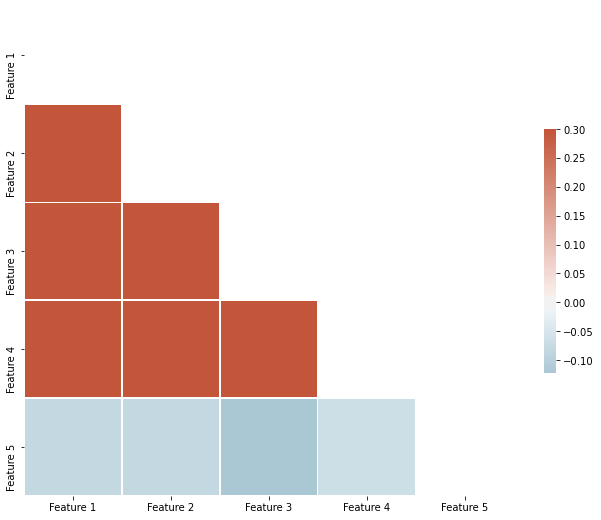

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = proxy.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
y=proxy['Feature 1']
X=proxy['Feature 2']
res = stats.linregress(X,y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 1.000000


In [40]:
for i in np.arange(1,5):
    
    y=proxy['Feature 1']
    
    X=proxy.iloc[:,i]
    
    res = stats.linregress(X,y)
    r2=res.rvalue**2
    print(f"R-squared: {res.rvalue**2:.6f}")
    vif = 1/(1-r2)
    print ('VIF of Feature {} with {}'.format(i+1, "Feature 1"), vif)
    print("")

R-squared: 1.000000
VIF of Feature 2 with Feature 1 inf

R-squared: 0.950740
VIF of Feature 3 with Feature 1 20.30056335221401

R-squared: 0.980920
VIF of Feature 4 with Feature 1 52.40998864414569

R-squared: 0.006229
VIF of Feature 5 with Feature 1 1.006268068628911



<ipython-input-40-66eb0fb8fd80>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1-r2)


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [42]:
calc_vif(proxy)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Feature 1,inf
1,Feature 2,inf
2,Feature 3,46.354710
3,Feature 4,241.930343
4,Feature 5,13.250278


In [ ]:
import numpy as np
import pandas as pd
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor   
from joblib import Parallel, delayed

In [78]:
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) 
                                            for ix in range(len(variables)))
 
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print ('VIF is ' + str(max(vif)) + ' ' + 'dropping ' + X[variables].columns[maxloc])
            
            variables.pop(maxloc)
            dropped=True
 
    print('Remaining variables:')
    print([variables])
    return 


In [79]:
calculate_vif_(proxy)

VIF is inf dropping Feature 1
VIF is 299.3857233076956 dropping Feature 2
VIF is 70.87650502990464 dropping Feature 4
Remaining variables:
[['Feature 3', 'Feature 5']]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [107]:
for i in np.arange(1,5):

    var1 = np.var(proxy['Feature 1'])
    var2 = np.var(proxy.iloc[:,i])
    cov = np.cov(proxy['Feature 1'], proxy.iloc[:,i])[0][1]
    
    asso = np.square(cov) / (var1*var2)

    print ('Association of Feature {} with {} :'.format(i+1, "Feature 1"), asso)
    

Association of Feature 2 with Feature 1 : 1.041232819658476
Association of Feature 3 with Feature 1 : 0.989941985921839
Association of Feature 4 with Feature 1 : 1.0213657514412269
Association of Feature 5 with Feature 1 : 0.006485864925820933


cosine distance between Feature 1 and Feature 2 1.0
cosine distance between Feature 1 and Feature 3 0.9649002025515011
cosine distance between Feature 1 and Feature 4 0.9978700494360173
cosine distance between Feature 1 and Feature 5 0.873059148603771


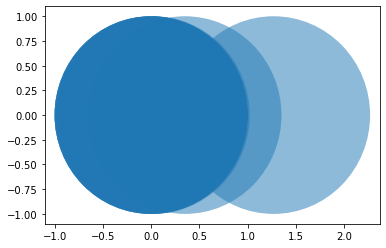

In [166]:
from scipy import spatial

for i in np.arange(1,5):
    
    result = 1 - spatial.distance.cosine(proxy['Feature 1'], proxy.iloc[:,i])
    print ('cosine distance between Feature 1 and Feature {}'.format(i+1), result)
    
    r = 1
    d = 10 * r * (1 - result)

    circle1=plt.Circle((0, 0), r, alpha=.5)
    circle2=plt.Circle((d, 0), r, alpha=.5)

    plt.ylim([-1.1, 1.1])
    plt.xlim([-1.1, 1.1 + d])
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    fig.gca().add_artist(circle2)

    

In [152]:
from sklearn.metrics import mutual_info_score
for i in np.arange(6,9):
    mi = mutual_info_score(proxy['Cat 1'], proxy.iloc[:,i])
    print ('Mutual info between Cat 1 and {}'.format(proxy.iloc[:,i].name), mi)


Mutual info between Cat 1 and Cat 2 0.0014418857149821607
Mutual info between Cat 1 and Cat 3 0.19127284867825473
Mutual info between Cat 1 and Cat 4 0.6802920001921533


<a id="gt"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Get in touch</span>
</div>

<img style="float: left; width: 80px; padding-right: 25px;" src="preview.svg">

<span style="font-family:Futura Next; font-size:2.0em; float: left;"> www.linkedin.com/in/srayagarwal</span>   \\


<span style="font-family:Futura Next; font-size:2.0em; float: left;"> www.linkedin.com/in/shashinmishra</span>
